# Flower Classification with Transfer Learning

The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.

For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

### Import Required Libraries and Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Collect Image Paths for Each Flower Category (daisy,dandelion,rose,sunflower,tulip)

In [3]:
daisy = glob('daisy/*.jpg')
dandelion = glob('dandelion/*.jpg')
rose = glob('rose/*.jpg')
sunflower = glob('sunflower/*.jpg')
tulip = glob('tulip/*.jpg')

### Define Classes and Corresponding Labels

In [8]:
classes = {0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}

### Load and Label Images for Each Flower Category

In [9]:
images = []
labels = []

for i in daisy:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in dandelion:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in rose:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in sunflower:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

for i in tulip:
    img = plt.imread(i)
    images.append(img)
    labels.append(4)

### Plot first few images

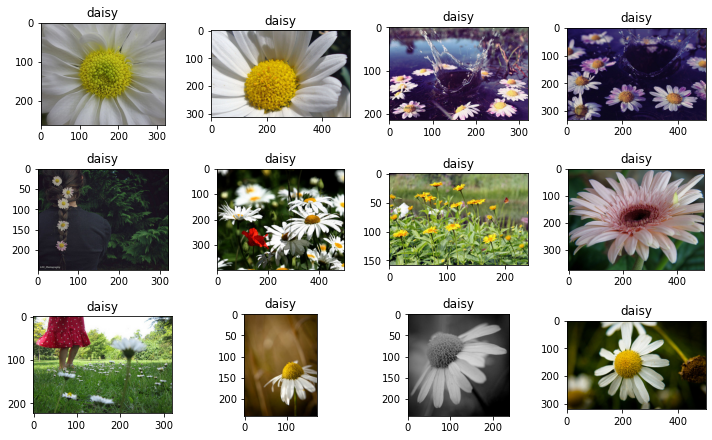

In [10]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Shuffle the images

In [11]:
images,labels = shuffle(images,labels)

### Plot some of the image after the shuffle

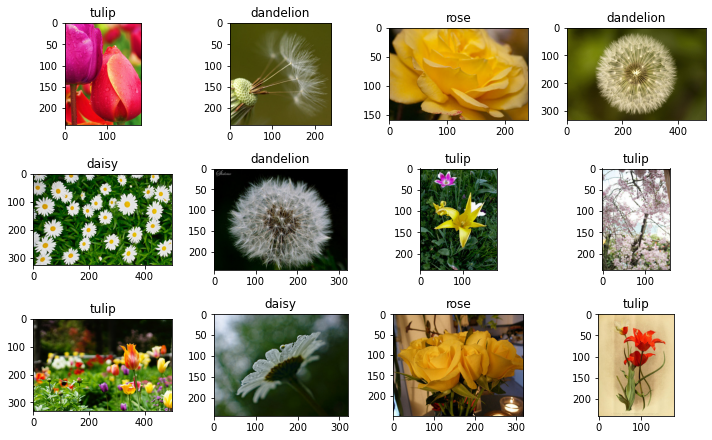

In [12]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Resize Images to MobileNetV2 Input Shape (224,224,3)

In [13]:
X = []

for i in images:
    X.append(resize(i, (224,224,3)))

### Plot some of the images after resizing

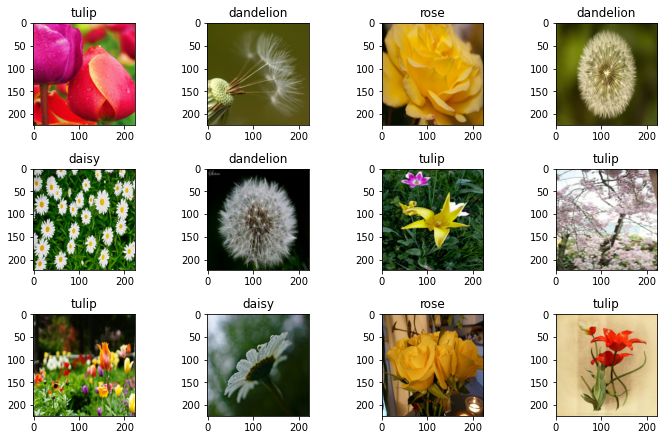

In [14]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Convert image and label datatypes from list to Numpy array

In [15]:
X = np.array(X)
y = np.array(labels)

### Convert Images and Labels to NumPy Arrays

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### MobileNetV2 Pre-trained Feature Extractor Model URL 
* "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [17]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

### Load Pre-trained MobileNetV2 Feature Extractor Model

In [21]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x16059dcf370>

### Define Number of Output Classes

In [23]:
num_of_classes = 5

### Instantiate MobileNetV2 without Top Layer as Feature Extractor

In [22]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

### Build Transfer Learning Model using MobileNetV2 Feature Extractor

In [24]:
model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(num_of_classes, activation = 'softmax')
])

### Compile Transfer Learning Model

In [25]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [26]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
103/103 [==============================] - 68s 589ms/step - loss: 0.8860 - accuracy: 0.6390 - val_loss: 0.4064 - val_accuracy: 0.8555
Epoch 2/10
103/103 [==============================] - 61s 588ms/step - loss: 0.3895 - accuracy: 0.8686 - val_loss: 0.3585 - val_accuracy: 0.8671
Epoch 3/10
103/103 [==============================] - 75s 728ms/step - loss: 0.2639 - accuracy: 0.9119 - val_loss: 0.3431 - val_accuracy: 0.8671
Epoch 4/10
103/103 [==============================] - 70s 683ms/step - loss: 0.1977 - accuracy: 0.9357 - val_loss: 0.3578 - val_accuracy: 0.8613
Epoch 5/10
103/103 [==============================] - 66s 637ms/step - loss: 0.1467 - accuracy: 0.9534 - val_loss: 0.3223 - val_accuracy: 0.8786
Epoch 6/10
103/103 [==============================] - 68s 657ms/step - loss: 0.1301 - accuracy: 0.9613 - val_loss: 0.3307 - val_accuracy: 0.8555
Epoch 7/10
103/103 [==============================] - 73s 708ms/step - loss: 0.0857 - accuracy: 0.9723 - val_loss: 0.3362 - val_ac

### Model Prediction on Test Data

In [28]:
y_pred = model.predict(X_test)

27/27 [==============================] - 19s 515ms/step


In [31]:
y_pred = [np.argmax(i) for i in y_pred]

### Calculate Accuracy Score

In [32]:
accuracy_score(y_test,y_pred)

0.8738425925925926

### Plot confusion matrix on heatmap

<AxesSubplot:>

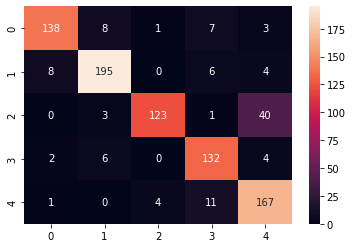

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Print classification report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       157
           1       0.92      0.92      0.92       213
           2       0.96      0.74      0.83       167
           3       0.84      0.92      0.88       144
           4       0.77      0.91      0.83       183

    accuracy                           0.87       864
   macro avg       0.88      0.87      0.87       864
weighted avg       0.88      0.87      0.87       864



***